Import a bunch of packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import random
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Making fake data for a simple linear regression model.

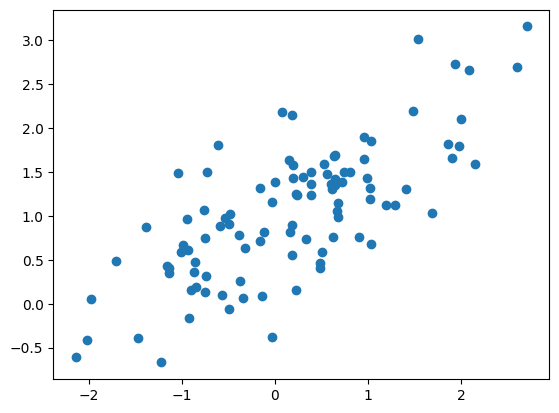

In [2]:
np.random.seed(101)
x1 = np.random.normal(0,1,100)

Beta_0 = 1
Beta_1 = .5

y = Beta_0 + Beta_1*x1+ np.random.normal(0,.5,100)

plt.scatter(x1,y)

Fit the model and view the output.

In [3]:
X = sm.add_constant(x1)
mod = sm.OLS(y,X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     117.4
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.87e-18
Time:                        18:26:52   Log-Likelihood:                -75.235
No. Observations:                 100   AIC:                             154.5
Df Residuals:                      98   BIC:                             159.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9578      0.053     18.232      0.000       0.854       1.062
x1             0.5437      0.050     10.837      0.000       0.444       0.643
==============================================================================
Omnibus:                        0.249   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.248
Skew:                           0.113   Prob(JB):                        0.883
Kurtosis:                       2.906   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predict at the point x=0.

In [4]:
# Make a new data frame to predict
# sm.add_constant won't work for a single line, so we will add the constant
# in manually. It is labelled as "const"
X_new = pd.DataFrame({"const":[1],"x":[0]})
mod.predict(X_new)

0    0.957815
dtype: float64

Get confidence intervals for the mean of the prediction and for a new individual observation.

In [7]:
# get_prediction is a new function we are using for predictions. Summary.frame prints the matrix
mod.get_prediction(X_new).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.957815,0.052534,0.853563,1.062068,-0.076737,1.992368


Plot the confidence interval for the mean.

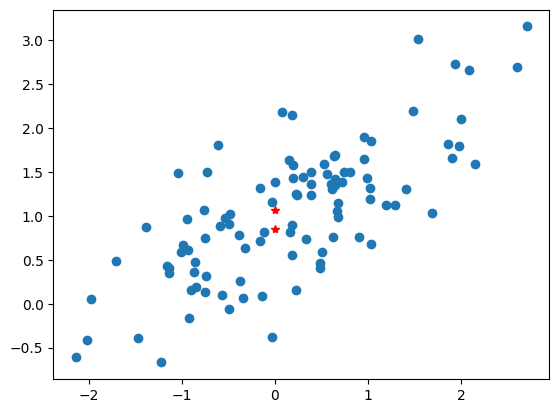

In [8]:
pred_int = mod.get_prediction(X_new).summary_frame(alpha=0.05)

plt.scatter(x1,y)
plt.plot([0,0], [pred_int.mean_ci_lower,pred_int.mean_ci_upper], marker='*', ls='none', color = "r")


Add the confidence interval for a new observation.

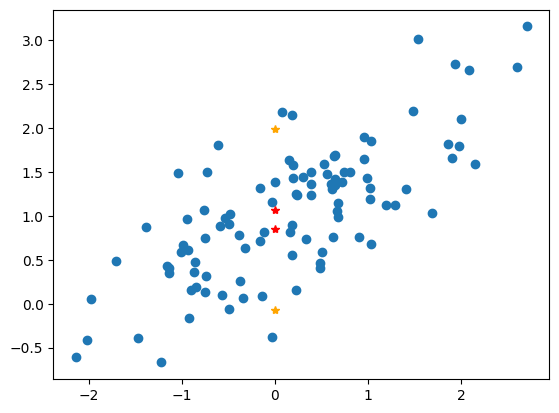

In [9]:
plt.scatter(x1,y)
plt.plot([0,0], [pred_int.mean_ci_lower,pred_int.mean_ci_upper], marker='*', ls='none', color = "r")
plt.plot([0,0], [pred_int.obs_ci_lower,pred_int.obs_ci_upper], marker='*', ls='none', color = "orange")


Generate adata frame with confidence intervals for the meana nd for prediction intervals for a range of values.

In [10]:
# Do a loop over all possible x values and get the predictions and intervals
pred_int_mat = pd.DataFrame()
x_grid = np.linspace(-2,2,100)
for i in range(100):
  X_new = pd.DataFrame({"const":[1],"x":[x_grid[i]]})
  pred_int_mat = pred_int_mat.append(mod.get_prediction(X_new).summary_frame(alpha=0.05))

pred_int_mat

<ipython-input-10-f1f04014c63d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_int_mat = pred_int_mat.append(mod.get_prediction(X_new).summary_frame(alpha=0.05))
<ipython-input-10-f1f04014c63d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_int_mat = pred_int_mat.append(mod.get_prediction(X_new).summary_frame(alpha=0.05))
<ipython-input-10-f1f04014c63d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_int_mat = pred_int_mat.append(mod.get_prediction(X_new).summary_frame(alpha=0.05))
<ipython-input-10-f1f04014c63d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_int_mat = pred_int_mat.append(mod.get_prediction(X_

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.129564,0.120429,-0.368553,0.109424,-1.186232,0.927103
0,-0.107597,0.118603,-0.342961,0.127767,-1.163451,0.948257
0,-0.085630,0.116783,-0.317383,0.146123,-1.140685,0.969425
0,-0.063663,0.114971,-0.291819,0.164493,-1.117933,0.990608
0,-0.041695,0.113165,-0.266268,0.182878,-1.095196,1.011806
...,...,...,...,...,...,...
0,1.957326,0.098626,1.761607,2.153046,0.909597,3.005056
0,1.979294,0.100355,1.780142,2.178446,0.930917,3.027670
0,2.001261,0.102096,1.798654,2.203867,0.952223,3.050299
0,2.023228,0.103847,1.817147,2.229310,0.973514,3.072943


Plot a line of the confidence intervals for a range of values.

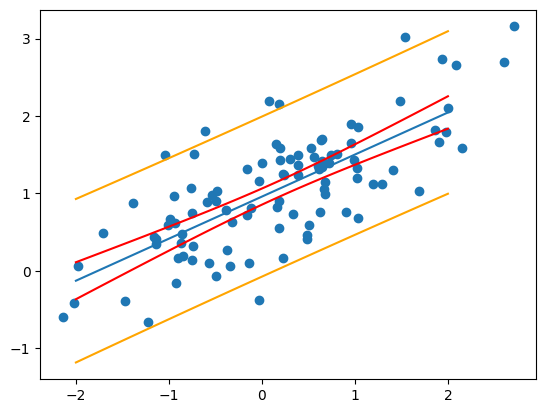

In [11]:
plt.scatter(x1,y)
plt.plot(x_grid,pred_int_mat["mean"])
plt.plot(x_grid,pred_int_mat["mean_ci_lower"],color="r")
plt.plot(x_grid,pred_int_mat["mean_ci_upper"],color = "r")
plt.plot(x_grid,pred_int_mat["obs_ci_lower"],color = "orange")
plt.plot(x_grid,pred_int_mat["obs_ci_upper"],color = "orange")


Load and view the bike data set.

In [12]:
bikes = pd.read_csv("https://richardson.byu.edu/220/bikes.csv")
bikes

,Count,Temperature,Humidity,Wind_speed,Visibility,Rainfall,Seasons,Holiday
0,449,1.7,23,1.4,2000,0.0,Winter,No Holiday
1,479,4.3,41,1.3,1666,0.0,Winter,No Holiday
2,333,5.8,85,1.7,349,0.0,Winter,No Holiday
3,393,-0.3,38,4.8,1823,0.0,Winter,No Holiday
4,321,-2.3,25,0.0,1962,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...
360,752,9.1,57,1.1,562,0.0,Autumn,No Holiday
361,672,9.3,61,1.5,390,0.0,Autumn,No Holiday
362,635,7.9,14,1.7,1688,0.0,Autumn,No Holiday
363,661,5.6,27,0.3,1522,0.0,Autumn,No Holiday


This data set is a year's worth of data and it is in order. Let's split of the last day and see if we can predict it.

In [13]:
bikes_new = pd.DataFrame(bikes.iloc[364:365])
bikes_fit = bikes.iloc[0:364]

We will scale the data. We don't absolutely need to in this case, but it is helpful to see how it is done.

In [14]:
X = pd.get_dummies(bikes_fit.drop(columns = ["Count"]),drop_first = True)
# we will make a scaling object for X and y separately, so we label this for X
scale_for_X = StandardScaler()
# Fit this scaling object to X. This stores the mean and standard deviations in
# the scaling object to be used on test data or in this case, a new observation
scale_for_X.fit(X)

# Apply the scaling to X
scaled_X = scale_for_X.transform(X)

scaled_X = pd.DataFrame(scaled_X,columns = X.columns)

y = bikes_fit.Count
# This makes the scaling object for Y
scale_for_Y = StandardScaler()
scale_for_Y.fit(y.values.reshape(-1,1))
scaled_y = pd.DataFrame(scale_for_Y.transform(y.values.reshape(-1,1)),columns = ["Count"])

Fit the model on the scaled data and view the output.

In [15]:
mod_reg = sm.OLS(scaled_y,sm.add_constant(scaled_X)).fit()
mod_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     42.28
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           5.27e-51
Time:                        18:39:42   Log-Likelihood:                -383.65
No. Observations:                 364   AIC:                             787.3
Df Residuals:                     354   BIC:                             826.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.992e-17      0.037   8.11e-16      1.000      -0.073       0.073
Temperature            0.4406      0.082      5.379      0.000       0.280       0.602
Humidity              -0.3326      0.050     -6.588      0.000      -0.432      -0.233
Wind_speed            -0.0117      0.039     -0.300      0.764      -0.088       0.065
Visibility            -0.0573      0.046     -1.238      0.216      -0.148       0.034
Rainfall              -0.1135      0.043     -2.649      0.008      -0.198      -0.029
Seasons_Spring        -0.0027      0.048     -0.056      0.955      -0.096       0.091
Seasons_Summer        -0.0994      0.059     -1.697      0.091      -0.215       0.016
Seasons_Winter        -0.3597      0.071     -5.096      0.000      -0.499      -0.221
Holiday_No Holiday    -0.0047      0.038     -0.124      0.901      -0.079       0.069
==============================================================================
Omnibus:                       29.150   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.774
Skew:                          -0.513   Prob(JB):                     2.56e-11
Kurtosis:                       4.470   Cond. No.                         4.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Refit after removing insignificant predictors.

In [16]:
mod_reg = sm.OLS(scaled_y,sm.add_constant(scaled_X.drop(columns = ["Wind_speed","Holiday_No Holiday"]))).fit()
mod_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     54.63
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.01e-52
Time:                        18:40:13   Log-Likelihood:                -383.70
No. Observations:                 364   AIC:                             783.4
Df Residuals:                     356   BIC:                             814.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.992e-17      0.037   8.13e-16      1.000      -0.072       0.072
Temperature        0.4444      0.081      5.503      0.000       0.286       0.603
Humidity          -0.3331      0.050     -6.628      0.000      -0.432      -0.234
Visibility        -0.0596      0.045     -1.314      0.190      -0.149       0.030
Rainfall          -0.1122      0.042     -2.652      0.008      -0.195      -0.029
Seasons_Spring    -0.0059      0.046     -0.128      0.898      -0.097       0.085
Seasons_Summer    -0.1023      0.058     -1.773      0.077      -0.216       0.011
Seasons_Winter    -0.3591      0.070     -5.130      0.000      -0.497      -0.221
==============================================================================
Omnibus:                       29.023   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.364
Skew:                          -0.506   Prob(JB):                     1.91e-11
Kurtosis:                       4.494   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We need to make the new data look like the old data

In [17]:
bikes_new

,Count,Temperature,Humidity,Wind_speed,Visibility,Rainfall,Seasons,Holiday
364,720,6.6,35,1.3,1409,0.0,Autumn,No Holiday


In [18]:
X_new = pd.get_dummies(bikes_new.drop(columns = ["Count"]))
X_new = X_new.reindex(columns = X.columns, fill_value=0)

X_new

,Temperature,Humidity,Wind_speed,Visibility,Rainfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
364,6.6,35,1.3,1409,0.0,0,0,0,1


In [19]:
# Drop the target variable from the new observation and get dummies
X_new = pd.get_dummies(bikes_new.drop(columns = ["Count"]))

# The previous step only had one season value (Autumn) so printing it off won't have
# Winter, Summer, or Spring values. We reindex the
# columns according to the full X matrix that has all the factor levels.
X_new = X_new.reindex(columns = X.columns, fill_value=0)

# Apply the scaling object we created earlier to the new data
scaled_X_new = pd.DataFrame(scale_for_X.transform(X_new),columns = X.columns)

scaled_X_new

,Temperature,Humidity,Wind_speed,Visibility,Rainfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
0,-0.74808,-0.661334,-0.801256,-0.121001,-0.193899,-0.58158,-0.58158,-0.573121,0.228086


In [20]:
# Again, adding a constant with sm.add_constant doesn't work so well with a single observation
# so we add it manually
scaled_X_new["const"] = 1.0

# We also have to drop the variableswe dropped in the model
# we are wanting to use to predict. Note that the scaling object needs all the variables
# to be present, so the order here (scaling first then dropping variable) is important
mod_reg.get_prediction(scaled_X_new.drop(columns = ["Wind_speed","Holiday_No Holiday"])).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.473806,0.058573,-0.588999,-0.358612,-1.859368,0.911757


This is on the standardized scale. We can use the original variable's mean and sd to scale back.

In [22]:
mod_reg.get_prediction(scaled_X_new.drop(columns = ["Wind_speed","Holiday_No Holiday"])).summary_frame(alpha=0.05)*np.std(bikes_fit.Count) + np.mean(bikes_fit.Count)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,495.298803,724.614385,445.680677,544.916928,-101.515036,1092.112641


Or use this. Unfortunately it does get rid of the labeling.

In [25]:
scale_for_Y.inverse_transform(mod_reg.get_prediction(scaled_X_new.drop(columns = ["Wind_speed","Holiday_No Holiday"])).summary_frame(alpha=0.05))

array([[ 495.29880282,  724.61438455,  445.68067741,  544.91692823,
        -101.51503579, 1092.11264143]])

The prediction is bad, we don't like seeing this less than 0.

(array([46., 70., 23., 48., 36., 55., 57., 21.,  6.,  3.]),
 array([   0. ,  179.8,  359.6,  539.4,  719.2,  899. , 1078.8, 1258.6,
        1438.4, 1618.2, 1798. ]),
 <BarContainer object of 10 artists>)

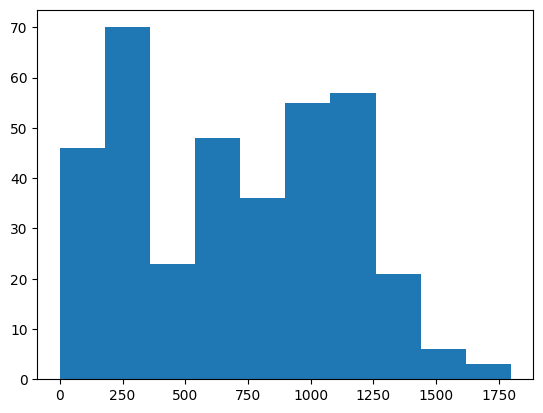

In [24]:
plt.hist(bikes.Count)

In [ ]:
# built model using X_train_some_hot
# X_test, polynomimal X_test
# X_test_all_hot[X_train_some_hot.columns]
